In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sci
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

# GitHub: https://github.com/MiriCaradonna/planetary_remote_sensing

# Part 1: Diviner Lunar Radiometer Data Analysis

## Problem 1: Brightness Temperature Analysis

### Part (a)

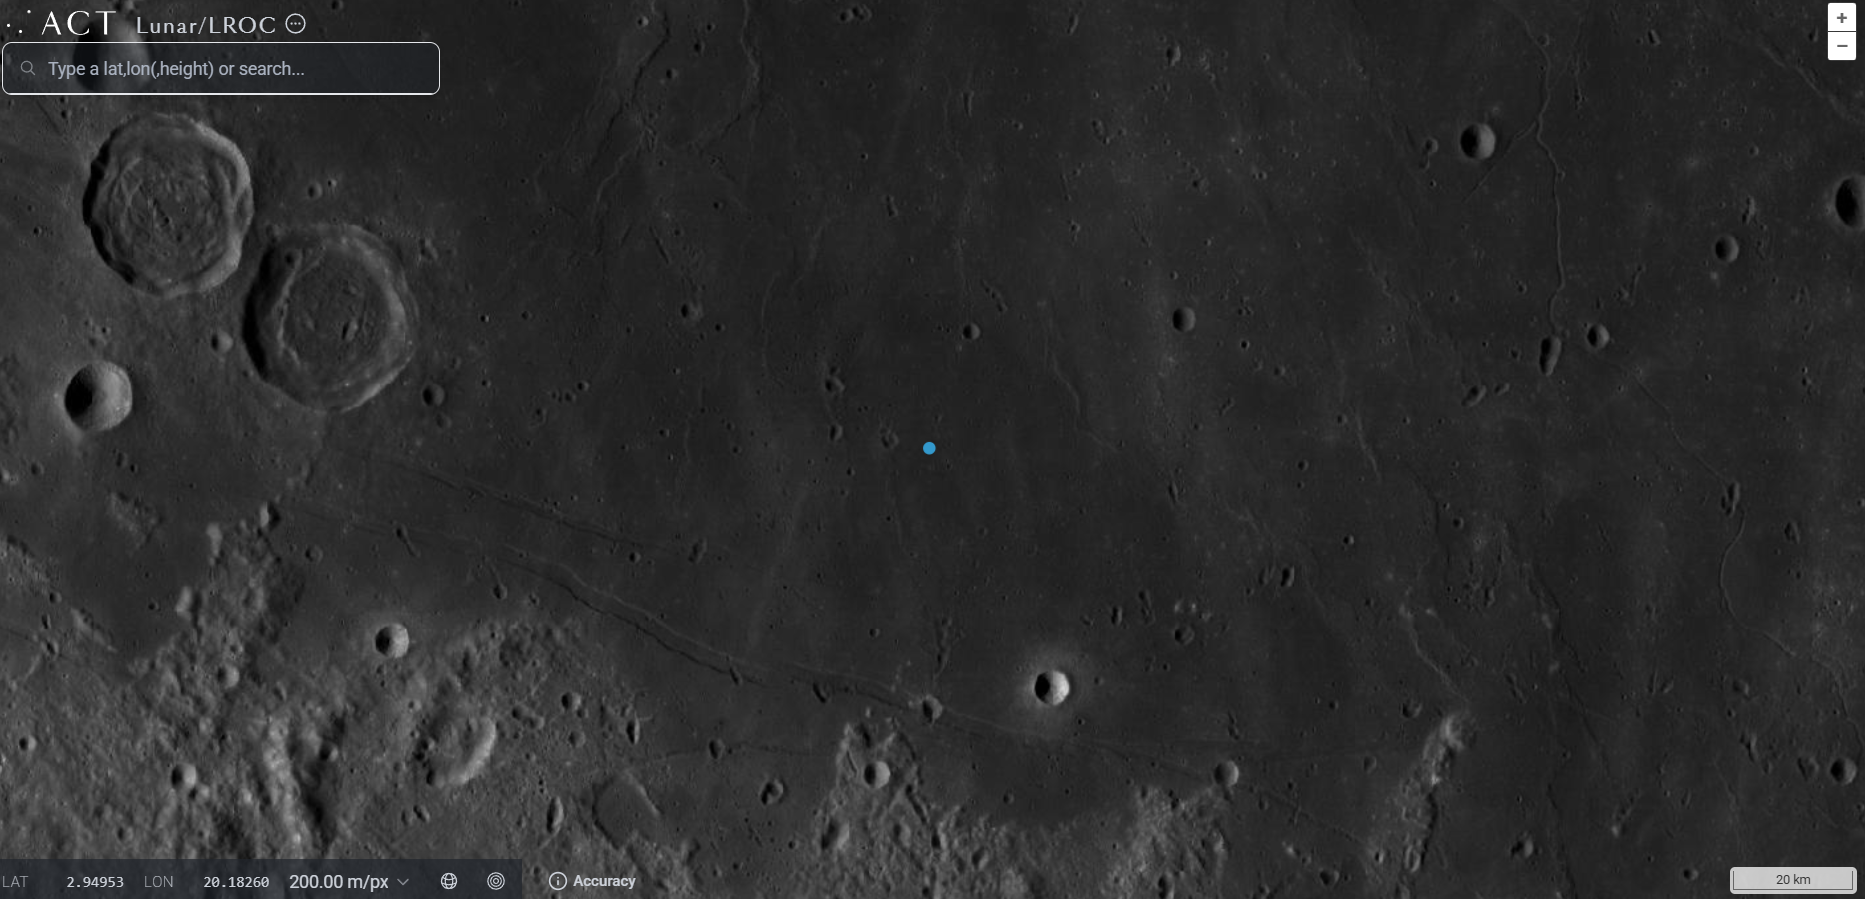

Most of the surrounding terrain for this area looks flat with some really small craters. About 100 km out from these coordinates we start to see some big craters and more surface roughness

### Part (b)

In [2]:
# Loading in the Diviner data
data = pd.read_csv(r"C:\Users\Mirie\Downloads\astr5830-s25_diviner-example-data.txt", sep='\s+', header=None,skiprows=1)
# Setting the column names
data.columns = ['c', 'cloctime', 'csunzen',  'radiance', 'tb']

In [3]:
data

c  cloctime     csunzen  radiance          tb
0     6.0   4.43444  113.480217    0.1504   95.675003
1     6.0   4.42889  113.565460    0.2727  103.653000
2     6.0   4.42972  113.553421    0.1866   98.436996
3     6.0   4.43056  113.540733    0.2344  101.514000
4     6.0   4.43111  113.529350    0.2285  101.162003
...   ...       ...         ...       ...         ...
8931  9.0   7.10306   73.452881    0.4422  244.022003
8932  9.0   7.10333   73.448357    0.4487  246.811996
8933  9.0   7.10361   73.443893    0.4487  246.822006
8934  9.0   7.10389   73.439507    0.4482  246.630997
8935  9.0   7.10417   73.435127    0.4522  248.360001

[8936 rows x 5 columns]

In [4]:
# Converting the dataframe columns into lists
spectral_band = data['c']
local_time = data['cloctime']
sza = data['csunzen']
radiance = data['radiance']
brightness_temp = data['tb']

Text(0.5, 1.0, 'Brightness Temp as a function of time')

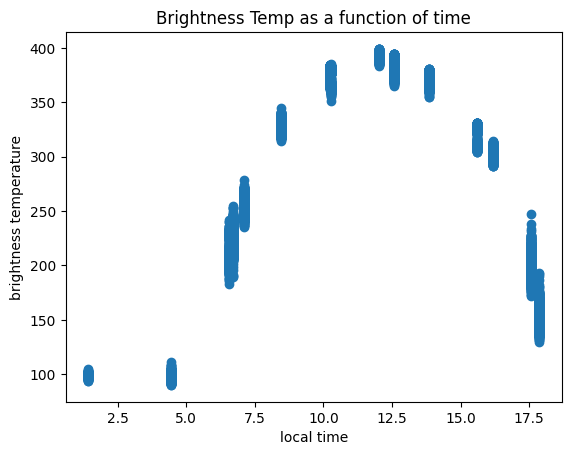

In [5]:
# Displaying the unbinned and unsorted brightness temp data
plt.scatter(local_time, brightness_temp)
plt.xlabel('local time')
plt.ylabel('brightness temperature')
plt.title('Brightness Temp as a function of time')

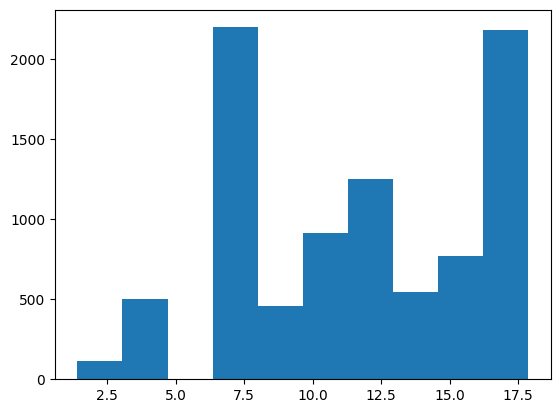

In [6]:
# This is to get the x positions of the bins
hist = plt.hist(local_time)

hist_time_arr = []
for i in range(len(hist[1]) - 1):
    x = hist[1][i] + (hist[1][i+1] - hist[1][i])/2
    hist_time_arr.append(x)

In [7]:
# Binning the data
bin0 = []
bin1 = []
bin2 = []
bin3 = []
bin4 = []
bin5 = []
bin6 = []
bin7 = []
bin8 = []
bin9 = []
bin10 = []
for i in range(len(local_time)):
    if local_time[i] < hist[1][0]:
        bin0.append(brightness_temp[i])
    if local_time[i] > hist[1][0] and local_time[i] < hist[1][1]:
        bin1.append(brightness_temp[i])  
    elif local_time[i] > hist[1][1] and local_time[i] < hist[1][2]:
        bin2.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][2] and local_time[i] < hist[1][3]:
        bin3.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][3] and local_time[i] < hist[1][4]:
        bin4.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][4] and local_time[i] < hist[1][5]:
        bin5.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][5] and local_time[i] < hist[1][6]:
        bin6.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][6] and local_time[i] < hist[1][7]:
        bin7.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][7] and local_time[i] < hist[1][8]:
        bin8.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][8] and local_time[i] < hist[1][9]:
        bin9.append(brightness_temp[i]) 
    elif local_time[i] > hist[1][9] and local_time[i] < hist[1][10]:
        bin10.append(brightness_temp[i]) 

In [8]:
# Sorting the binned data into the 4 channels
bin1_6 = []
bin1_7 = []
bin1_8 = []
bin1_9 = []
for i in range(len(bin1)):
    if spectral_band[i] == 6.0:
        bin1_6.append(bin1[i])
    elif spectral_band[i] == 7.0:
        bin1_7.append(bin1[i])
    elif spectral_band[i] == 8.0:
        bin1_8.append(bin1[i])
    elif spectral_band[i] == 9.0:
        bin1_9.append(bin1[i]) 

bin2_6 = []
bin2_7 = []
bin2_8 = []
bin2_9 = []
for i in range(len(bin2)):
    if spectral_band[i] == 6.0:
        bin2_6.append(bin2[i])
    elif spectral_band[i] == 7.0:
        bin2_7.append(bin2[i])
    elif spectral_band[i] == 8.0:
        bin2_8.append(bin2[i])
    elif spectral_band[i] == 9.0:
        bin2_9.append(bin2[i]) 

bin3_6 = []
bin3_7 = []
bin3_8 = []
bin3_9 = []
for i in range(len(bin3)):
    if spectral_band[i] == 6.0:
        bin3_6.append(bin3[i])
    elif spectral_band[i] == 7.0:
        bin3_7.append(bin3[i])
    elif spectral_band[i] == 8.0:
        bin3_8.append(bin3[i])
    elif spectral_band[i] == 9.0:
        bin3_9.append(bin3[i]) 

bin4_6 = []
bin4_7 = []
bin4_8 = []
bin4_9 = []
for i in range(len(bin4)):
    if spectral_band[i] == 6.0:
        bin4_6.append(bin4[i])
    elif spectral_band[i] == 7.0:
        bin4_7.append(bin4[i])
    elif spectral_band[i] == 8.0:
        bin4_8.append(bin4[i])
    elif spectral_band[i] == 9.0:
        bin4_9.append(bin4[i]) 

bin5_6 = []
bin5_7 = []
bin5_8 = []
bin5_9 = []
for i in range(len(bin5)):
    if spectral_band[i] == 6.0:
        bin5_6.append(bin5[i])
    elif spectral_band[i] == 7.0:
        bin5_7.append(bin5[i])
    elif spectral_band[i] == 8.0:
        bin5_8.append(bin5[i])
    elif spectral_band[i] == 9.0:
        bin5_9.append(bin5[i]) 

bin6_6 = []
bin6_7 = []
bin6_8 = []
bin6_9 = []
for i in range(len(bin2)):
    if spectral_band[i] == 6.0:
        bin6_6.append(bin6[i])
    elif spectral_band[i] == 7.0:
        bin6_7.append(bin6[i])
    elif spectral_band[i] == 8.0:
        bin6_8.append(bin6[i])
    elif spectral_band[i] == 9.0:
        bin6_9.append(bin6[i]) 

bin7_6 = []
bin7_7 = []
bin7_8 = []
bin7_9 = []
for i in range(len(bin7)):
    if spectral_band[i] == 6.0:
        bin7_6.append(bin7[i])
    elif spectral_band[i] == 7.0:
        bin7_7.append(bin7[i])
    elif spectral_band[i] == 8.0:
        bin7_8.append(bin7[i])
    elif spectral_band[i] == 9.0:
        bin7_9.append(bin7[i]) 

bin8_6 = []
bin8_7 = []
bin8_8 = []
bin8_9 = []
for i in range(len(bin8)):
    if spectral_band[i] == 6.0:
        bin8_6.append(bin8[i])
    elif spectral_band[i] == 7.0:
        bin8_7.append(bin8[i])
    elif spectral_band[i] == 8.0:
        bin8_8.append(bin8[i])
    elif spectral_band[i] == 9.0:
        bin8_9.append(bin8[i]) 

bin9_6 = []
bin9_7 = []
bin9_8 = []
bin9_9 = []
for i in range(len(bin9)):
    if spectral_band[i] == 6.0:
        bin9_6.append(bin9[i])
    if spectral_band[i] == 7.0:
        bin9_7.append(bin9[i])
    if spectral_band[i] == 8.0:
        bin9_8.append(bin9[i])
    if spectral_band[i] == 9.0:
        bin9_9.append(bin9[i]) 

bin10_6 = []
bin10_7 = []
bin10_8 = []
bin10_9 = []
for i in range(len(bin10)):
    if spectral_band[i] == 6.0:
        bin10_6.append(bin10[i])
    if spectral_band[i] == 7.0:
        bin10_7.append(bin10[i])
    if spectral_band[i] == 8.0:
        bin10_8.append(bin10[i])
    if spectral_band[i] == 9.0:
        bin10_9.append(bin10[i]) 


In [9]:
# Getting the mean and the standard deviation of all the data in the bins
binned_data_6 = []
binned_data_6.append(np.mean(bin1_6))
binned_data_6.append(np.mean(bin2_6))
binned_data_6.append(np.mean(bin3_6))
binned_data_6.append(np.mean(bin4_6))
binned_data_6.append(np.mean(bin5_6))
binned_data_6.append(np.mean(bin6_6))
binned_data_6.append(np.mean(bin7_6))
binned_data_6.append(np.mean(bin8_6))
binned_data_6.append(np.mean(bin9_6))
binned_data_6.append(np.mean(bin10_6))

error_bars_6 = []
error_bars_6.append(np.std(bin1_6))
error_bars_6.append(np.std(bin2_6))
error_bars_6.append(np.std(bin3_6))
error_bars_6.append(np.std(bin4_6))
error_bars_6.append(np.std(bin5_6))
error_bars_6.append(np.std(bin6_6))
error_bars_6.append(np.std(bin7_6))
error_bars_6.append(np.std(bin8_6))
error_bars_6.append(np.std(bin9_6))
error_bars_6.append(np.std(bin10_6))

binned_data_7 = []
binned_data_7.append(np.mean(bin1_7))
binned_data_7.append(np.mean(bin2_7))
binned_data_7.append(np.mean(bin3_7))
binned_data_7.append(np.mean(bin4_7))
binned_data_7.append(np.mean(bin5_7))
binned_data_7.append(np.mean(bin6_7))
binned_data_7.append(np.mean(bin7_7))
binned_data_7.append(np.mean(bin8_7))
binned_data_7.append(np.mean(bin9_7))
binned_data_7.append(np.mean(bin10_7))

error_bars_7 = []
error_bars_7.append(np.std(bin1_7))
error_bars_7.append(np.std(bin2_7))
error_bars_7.append(np.std(bin3_7))
error_bars_7.append(np.std(bin4_7))
error_bars_7.append(np.std(bin5_7))
error_bars_7.append(np.std(bin6_7))
error_bars_7.append(np.std(bin7_7))
error_bars_7.append(np.std(bin8_7))
error_bars_7.append(np.std(bin9_7))
error_bars_7.append(np.std(bin10_7))

binned_data_8 = []
binned_data_8.append(np.mean(bin1_8))
binned_data_8.append(np.mean(bin2_8))
binned_data_8.append(np.mean(bin3_8))
binned_data_8.append(np.mean(bin4_8))
binned_data_8.append(np.mean(bin5_8))
binned_data_8.append(np.mean(bin6_8))
binned_data_8.append(np.mean(bin7_8))
binned_data_8.append(np.mean(bin8_8))
binned_data_8.append(np.mean(bin9_8))
binned_data_8.append(np.mean(bin10_8))

error_bars_8 = []
error_bars_8.append(np.std(bin1_8))
error_bars_8.append(np.std(bin2_8))
error_bars_8.append(np.std(bin3_8))
error_bars_8.append(np.std(bin4_8))
error_bars_8.append(np.std(bin5_8))
error_bars_8.append(np.std(bin6_8))
error_bars_8.append(np.std(bin7_8))
error_bars_8.append(np.std(bin8_8))
error_bars_8.append(np.std(bin9_8))
error_bars_8.append(np.std(bin10_8))

binned_data_9 = []
binned_data_9.append(np.mean(bin1_9))
binned_data_9.append(np.mean(bin2_9))
binned_data_9.append(np.mean(bin3_9))
binned_data_9.append(np.mean(bin4_9))
binned_data_9.append(np.mean(bin5_9))
binned_data_9.append(np.mean(bin6_9))
binned_data_9.append(np.mean(bin7_9))
binned_data_9.append(np.mean(bin8_9))
binned_data_9.append(np.mean(bin9_9))
binned_data_9.append(np.mean(bin10_9))

error_bars_9 = []
error_bars_9.append(np.std(bin1_9))
error_bars_9.append(np.std(bin2_9))
error_bars_9.append(np.std(bin3_9))
error_bars_9.append(np.std(bin4_9))
error_bars_9.append(np.std(bin5_9))
error_bars_9.append(np.std(bin6_9))
error_bars_9.append(np.std(bin7_9))
error_bars_9.append(np.std(bin8_9))
error_bars_9.append(np.std(bin9_9))
error_bars_9.append(np.std(bin10_9))

C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Mirie\anaconda3\envs\research_24\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


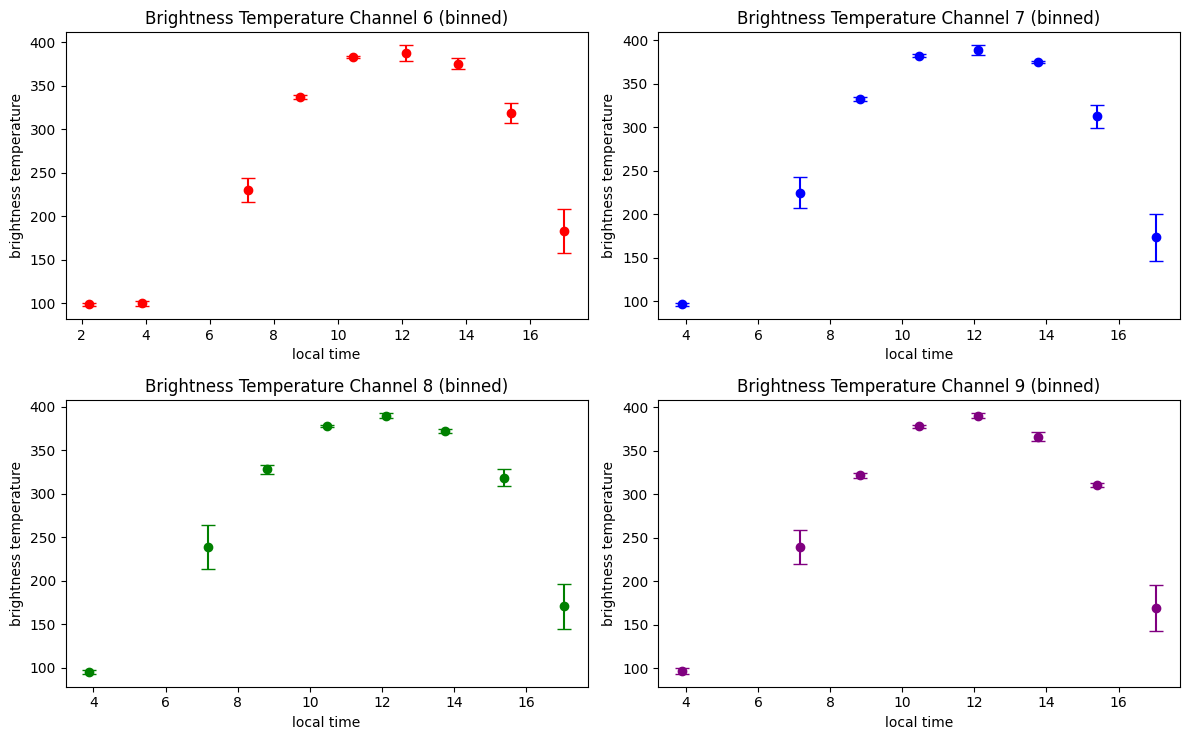

In [10]:
# Plotting all of the binned data for the 4 channels
fig, axs = plt.subplots(nrows = 2, ncols =2,figsize = [12,12/1.6])
axs[0,0].errorbar(hist_time_arr, binned_data_6, yerr = error_bars_6, fmt='o', capsize=5, color = 'red')
axs[0,1].errorbar(hist_time_arr, binned_data_7, yerr = error_bars_7, fmt='o', capsize=5, color = 'blue')
axs[1,0].errorbar(hist_time_arr, binned_data_8, yerr = error_bars_8, fmt='o', capsize=5, color = 'green')
axs[1,1].errorbar(hist_time_arr, binned_data_9, yerr = error_bars_9, fmt='o', capsize=5, color = 'purple')
axs[0,0].set_xlabel('local time')
axs[0,0].set_ylabel('brightness temperature')
axs[0,0].set_title('Brightness Temperature Channel 6 (binned)')

axs[0,1].set_xlabel('local time')
axs[0,1].set_ylabel('brightness temperature')
axs[0,1].set_title('Brightness Temperature Channel 7 (binned)')

axs[1,0].set_xlabel('local time')
axs[1,0].set_ylabel('brightness temperature')
axs[1,0].set_title('Brightness Temperature Channel 8 (binned)')

axs[1,1].set_xlabel('local time')
axs[1,1].set_ylabel('brightness temperature')
axs[1,1].set_title('Brightness Temperature Channel 9 (binned)')
plt.tight_layout()

### Part (c)

In [11]:
def wiens_law(T):
    return 2898/T

In [12]:
# Getting the maximum and minimum temps
temp_max = np.max(brightness_temp)
temp_min = np.min(brightness_temp)

print("The maximum daytime temperature is: %s" %temp_max)
print("The minimum nighttime temperature is: %s" %temp_min)

The maximum daytime temperature is: 399.12298584
The minimum nighttime temperature is: 90.097999573


In [13]:
# Using Wien's law to calculate the peak wavelengths
daytime_peak = wiens_law(temp_max)
nighttime_peak = wiens_law(temp_min)
print("The daytime peak wavelength for a blackbody is: %s microns" %daytime_peak)
print("The nighttime peak wavelength for a blackbody is: %s microns" %nighttime_peak)

The daytime peak wavelength for a blackbody is: 7.260919823750133 microns
The nighttime peak wavelength for a blackbody is: 32.16497606755361 microns


I would say that the channel that is closest to the daytime peak is channel 6, so that channel should be used during the day. Channel 7 almost exactly corresponds to the nighttime peak, so channel 7 should be used during the night.

## Problem 2: Thermal Parameters and Simple Model

In [14]:
# Setting constants
k = 0.01 #W/m/K
density = 1500 #kg/m^3
c_p = 800 #J/kg/K

#### Calculate Thermal Diffusivity

In [15]:
K = k / (density * c_p)
print("The thermal diffusivity is: %s m^2 s^-1" %K)

The thermal diffusivity is: 8.333333333333334e-09 m^2 s^-1


#### Calculate Thermal Skin Depth

In [16]:
P = 2548800 #29.5 days in seconds
l = np.sqrt(K * P / np.pi)
print("The thermal skin depth is: %s m" %l)

The thermal skin depth is: 0.08222470421074018 m


#### Calculate Thermal Parameter

I'm going to assume a mean temperature based on the brightness temperature calculation, as well as an emissivity of 1 for a blackbody...

In [17]:
temp_mean = np.mean(brightness_temp)
print("Mean temperature for lunar regolith: %s K" %temp_mean)

Mean temperature for lunar regolith: 266.38275094916435 K


In [18]:
sb = sci.Stefan_Boltzmann
omega = (np.sqrt(k * density * c_p) / (sb * (temp_mean**3))) * (1/np.sqrt(P))
print("The thermal parameter for lunar regolith is: %s" %omega)

The thermal parameter for lunar regolith is: 0.06401661531434129


Based on the calculation above, lunar regolith has low thermal parameter, meaning there's a large diurnal temperature variation. This is also evident from the plots of brightness temperature vs local time; the temperature varies by ~300 degrees K over the course of ~12 hours. Based on this conclusion, I would say what radiative equilibrium is not a good approximation for the moon.

## Problem 3: Radiative Equilibrium Model Fitting

### Part (a)

In [19]:
# Radiative eq model
def calc_temp(theta, A):
    sb = sci.Stefan_Boltzmann
    
    S_0 = 1361 #W/m^2
    eps = 0.95

    mu = np.cos(theta*(np.pi/180))
    return (((1-A)*S_0*mu)/(eps * sb))**0.25

Let's use channel 6 data and sza < 90 since we're observing during the day

In [20]:
# Getting the channel 6 daytime values
c6 = data[data['c'] == 6.]
c6_day = c6[c6['csunzen'] < 90]

c6_angles = c6_day['csunzen'].values
c6_tb = c6_day['tb'].values
c6_time = c6_day['cloctime'].values

In [21]:
# Calculating the meaximum surface temp, which is when the sza is closest to zero (minimized)
A = 0.12
T_max = calc_temp(np.min(c6_angles), A)

In [22]:
print("The maximum surface temperature is: %s K" %T_max)

The maximum surface temperature is: 386.13100920936324 K


In [23]:
# Calculating the mean surface temperature, which is the mean of the temp calculated at all sza
T_eq = np.mean(calc_temp(c6_angles, A))

In [24]:
print("The mean surface temperature is: %s K" %T_eq)

The mean surface temperature is: 294.1860882713443 K


In [25]:
# Calculated minimum surface temp from rquation given in HW problem statement
T_min = (-1*(T_max - (2*T_eq)))
print("The minimum surface temperature is: %s K" %T_min)

The minimum surface temperature is: 202.2411673333254 K


### Part (b)

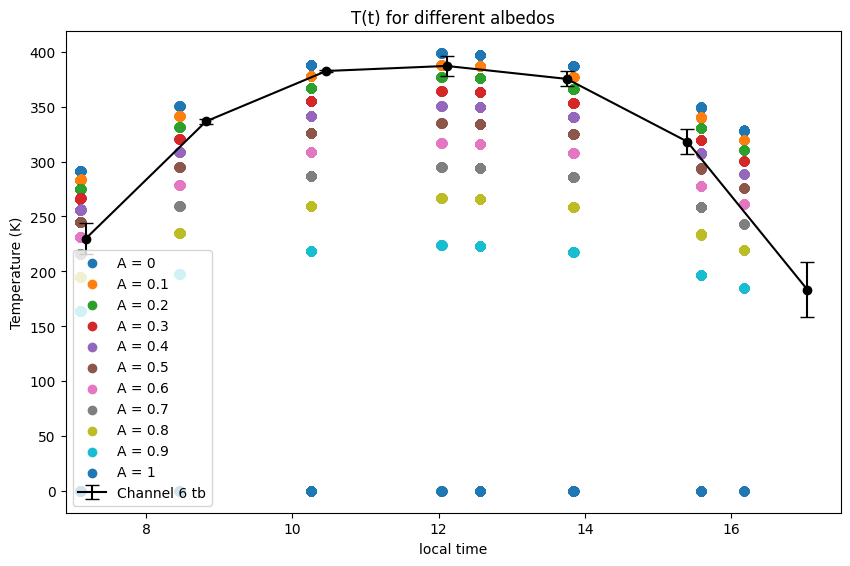

In [26]:
# Plotting the brightness temp c6 data and the radiative eq model
plt.figure(figsize = [10,10/1.6])
A_arr = np.linspace(0,1,11)
for A in A_arr:
    T = calc_temp(c6_angles, A)
    plt.scatter(c6_time,T, label = 'A = %g' %A)
plt.errorbar(hist_time_arr, binned_data_6, yerr = error_bars_6, capsize=5, color = 'black', label = 'Channel 6 tb')
plt.scatter(hist_time_arr, binned_data_6, color = 'black')
plt.title('T(t) for different albedos')
plt.xlabel('local time')
plt.xlim(6.9,17.5)
plt.ylabel('Temperature (K)')
plt.legend(loc = 'lower left')
plt.show()

In [27]:
# Calculating the best fit for the albedo
popt, pcov = curve_fit(calc_temp, c6_angles, c6_tb, p0 = 0.12) 

In [28]:
print("The best fit for the albedo is: %f +/- %f" %(popt[0], np.sqrt(pcov[0,0])))

The best fit for the albedo is: 0.147091 +/- 0.002556


### Part (c)

The Diviner data does not *exactly* match up with the outputs of the radiation model, but it's pretty close. The model is most accurate at midday, and the model and data start to vary significantly at night. This is probably because the model doesn't take into account other heat sources or varying regolith compositions, and assumes a constant emissivity, or the emissivity we assumed isn't accurate. The model also assumes that the moon is in radiative equilibrium, which I discovered earlier is not an accurate assumption for the moon; this should be taken into account for our model. The thermal parameter I calculated indicates that the temperature on the moon varies widely throughout the day/night cycle, so this should be reflected in the model.

# BONUS: Numerical Heat Diffusion Model

## BONUS Problem 1: Heat Equation and FTCS Method

## Part (a)

We are reducing this problem down to 1-D, as well as assuming there are no other sources of heat than the sun (no internal heating) and we're not considering albedo

## Part (b)

In [29]:
dx = 4e-5
dt = (0.5/K)*(dx**2)
print("The chosen spatial step is: %f and the chosen time step is: %f " %(dx,dt))

The chosen spatial step is: 0.000040 and the chosen time step is: 0.096000 


## Part (c)

In [53]:
density_rock = 3000
k_rock = 1.0

K_rock = k_rock / (density_rock * c_p)
print("The thermal diffusivity is: %s m^2 s^-1" %K_rock)

dx_rock = 4e-4
dt_rock = (0.5/K_rock)*(dx_rock**2)
print("The chosen spatial step is: %f and the chosen time step is: %f " %(dx_rock,dt_rock))

The thermal diffusivity is: 4.1666666666666667e-07 m^2 s^-1
The chosen spatial step is: 0.000400 and the chosen time step is: 0.192000 


## BONUS Problem 2: Implementing a 1D Thermal Model

In [39]:
def calc_diffusion(length,temp_left,temp_right,r,total_time,dx,dt):
    ''''
    length: length of the plate
    k = nu = kinematic viscosity
    temp_left = boundary condition at z=0
    temp_right = boundary condition at z=infinity
    r = dimensionless constant
    total_time = total time of the simulation
    dx = spatial step
    dt = temporal step
    
    '''
    
    x_vec = np.linspace(0, length, int(length/dx))
    
    t_vec = np.arange(0, total_time, dt)
    
    u = np.zeros([len(t_vec), len(x_vec)])
    
    u[:, 0] = temp_left
    u[:, -1] = temp_right
    
    for t in range(1, len(t_vec)-1):
        for x in range(1, len(x_vec)-1):
            u[t+1,x] = (1 - 2 * r) * u[t,x] + r * (u[t,x+1] + u[t,x-1])
            
    return x_vec, t_vec, u, x

In [44]:
#defining my values
length = 0.005
total_time = 20
t_vec = np.linspace(0, total_time, int(total_time/dt) + 1)
temp_left = T_eq + ((T_max - T_min)*np.sin(t_vec/(24*3600)))
temp_right = T_eq
r = K * dt / (dx**2)

#running the finite difference simulation
x_vec, t_vec, u, x = calc_diffusion(length,temp_left,temp_right,r,total_time,dx,dt)

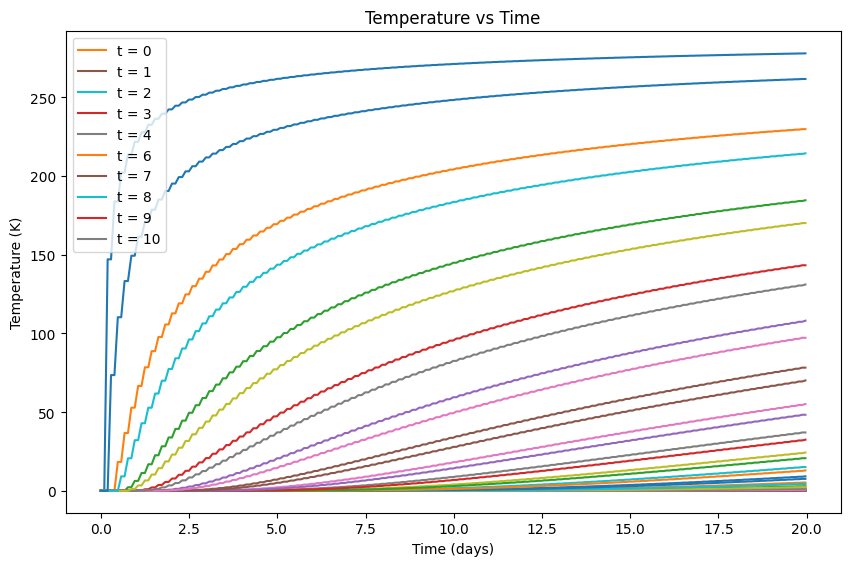

In [48]:
fig,ax = plt.subplots(figsize = [10,10/1.6])
i = 1
while i < len(u[1]):
    if i % 4 == 0:
        ax.plot(t_vec, u[:,i], label = 't = %i' %t_vec[i])
    else:
        ax.plot(t_vec, u[:,i])
    i+=3
ax.legend()
ax.set_xlabel("Time (days)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Temperature vs Time")
plt.show()

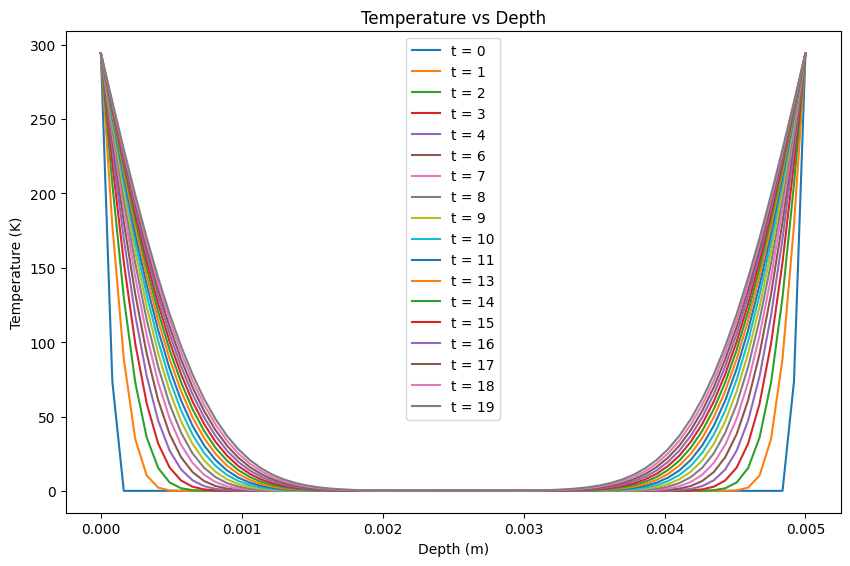

In [54]:
fig,ax = plt.subplots(figsize = [10,10/1.6])
i = 1
#z_vec = np.arange(0,len(u[x]))
while i < len(t_vec):
    if i % 4 == 0:
        ax.plot(x_vec, u[i,:], label = 't = %i' %t_vec[i])
    #else:
        #ax.plot(z_vec, u[i,:])
    i+=3
ax.legend()
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Temperature (K)")
ax.set_title("Temperature vs Depth")
plt.show()

This doesn't look right, but I'm gonna stop here for the bonus part...